<a href="https://colab.research.google.com/github/gtanmay123/Data-Science-Ml-projects/blob/main/Alzehimer's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load data
df_cross = pd.read_csv("/oasis_cross-sectional (1).csv")
df_long = pd.read_csv("/oasis_longitudinal.csv")

In [ ]:
df_cross

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [ ]:
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Data Cleaning


In [ ]:
df_long = df_long.rename(columns={"MRI ID": "ID", "EDUC": "Educ", "MR Delay": "Delay"})

# Create columns for easy distinction between the cohorts
df_cross["Cohort"] = "OASIS1"
df_long["Cohort"] = "OASIS2"

# Concatenate df_cross with df_long
df = pd.concat([df_cross, df_long])

# Drop rows with missing target variable
df.dropna(subset=["CDR"], inplace=True)

# Remove cols with only one distinct value
df.drop(["Hand"], axis=1, inplace=True)

# Use ID as row index
df.index = df.pop("ID")

In [ ]:
df_long

,Subject ID,ID,Group,Visit,Delay,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Cohort
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,OASIS2
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,OASIS2
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,OASIS2
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,OASIS2
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,OASIS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,OASIS2
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,OASIS2
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,OASIS2
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,OASIS2


In [ ]:
df_cross

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Cohort
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OASIS1
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OASIS1
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,OASIS1
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,OASIS1
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,OASIS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0,OASIS1
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0,OASIS1
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0,OASIS1
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0,OASIS1


In [ ]:
df["CDR"] = df["CDR"].map({0: 0, 0.5: 1, 1: 1, 2: 1, 3: 1})

# Split preprocessed datasets
df_cross = df.loc[df["Cohort"] == "OASIS1", ]
df_long = df.loc[df["Cohort"] == "OASIS2", ]

Visualisation

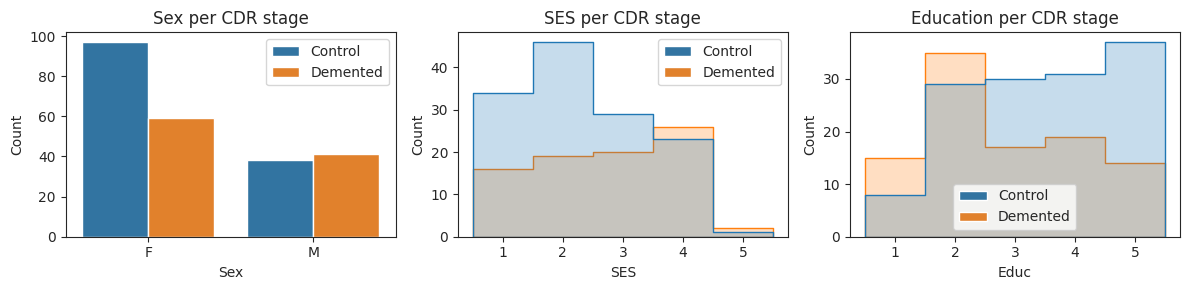

In [ ]:
# Import packages for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Create three subplots
ncol = 3
fig, axes = plt.subplots(1, ncol)

# Set the figure size
fig.set_figheight(3)
fig.set_figwidth(12)

# Set the Seaborn style to "ticks"
sns.set_style("ticks")

# Plot sex for different CDR stages
sns.countplot(df_cross, x="M/F", hue="CDR", ax=axes[0])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")

# Plot SES for different CDR stages
sns.histplot(df_cross, x="SES", hue="CDR", element="step", bins=5, discrete=True, ax=axes[1])
axes[1].set_xticks(range(1, 6))

# Plot education for different CDR stages
sns.histplot(df_cross, x="Educ", hue="CDR", element="step", bins=5, discrete=True, ax=axes[2])
axes[2].set_xticks(range(1, 6))

# Add legends
handles, _ = axes[0].get_legend_handles_labels()
labels = dict(zip(["Control", "Demented"], handles))
axes[0].legend(labels.values(), labels.keys())
axes[1].legend(labels.values(), labels.keys())
axes[2].legend(labels.values(), labels.keys(), loc='lower center')

# Add titles
axes[0].set_title('Sex per CDR stage')
axes[1].set_title('SES per CDR stage')
axes[2].set_title('Education per CDR stage')

# Adjust layout
plt.tight_layout()

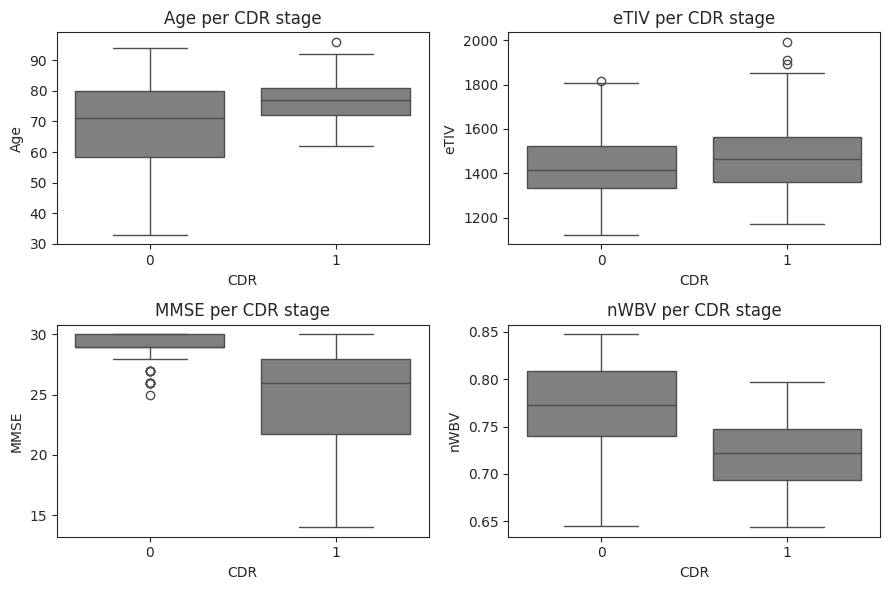

In [ ]:
# Create two subplots
fig, axes = plt.subplots(2, 2)

# Set the figure size
fig.set_figheight(6)
fig.set_figwidth(9)

# Set the Seaborn style to "ticks"
sns.set_style("ticks")

# Create boxplots for CDR and various variables
sns.boxplot(df_cross, x="CDR", y="Age", color="gray", ax=axes[0, 0])
sns.boxplot(df_cross, x="CDR", y="MMSE", color="gray", ax=axes[1, 0])
sns.boxplot(df_cross, x="CDR", y="eTIV", color="gray", ax=axes[0, 1])
sns.boxplot(df_cross, x="CDR", y="nWBV", color="gray", ax=axes[1, 1])

# Add titles to each subplot
axes[0, 0].set_title('Age per CDR stage')
axes[1, 0].set_title('MMSE per CDR stage')
axes[0, 1].set_title('eTIV per CDR stage')
axes[1, 1].set_title('nWBV per CDR stage')

# Adjust layout
plt.tight_layout()

Longitudnal Dataset

In [ ]:
# Group 'df_long' by "Visit" and "CDR", and get the size (count) of each group
grouped_df = df_long.groupby(["Visit", "CDR"]).size()

# Get the size (count) of each group when 'df_long' is grouped only by "Visit"
size_arr = df_long.groupby("Visit").size().values

# Create a new DataFrame 'count_df' to store the counts, 'Visit', 'CDR', and the corresponding percentage
count_df = pd.DataFrame({
    "Visit": [i[0] for i in grouped_df.index], # Extract the 'Visit' values from the multi-index
    "CDR": [i[1] for i in grouped_df.index], # Extract the 'CDR' values from the multi-index
    "Count": grouped_df.values # Extract the count values from the grouped DataFrame
})

# Calculate the percentage of each group count relative to the total count for the corresponding 'Visit'
count_df["Percentage"] = (
    count_df["Count"] / count_df["Visit"].map(lambda x: size_arr[round(x) - 1]) * 100
)

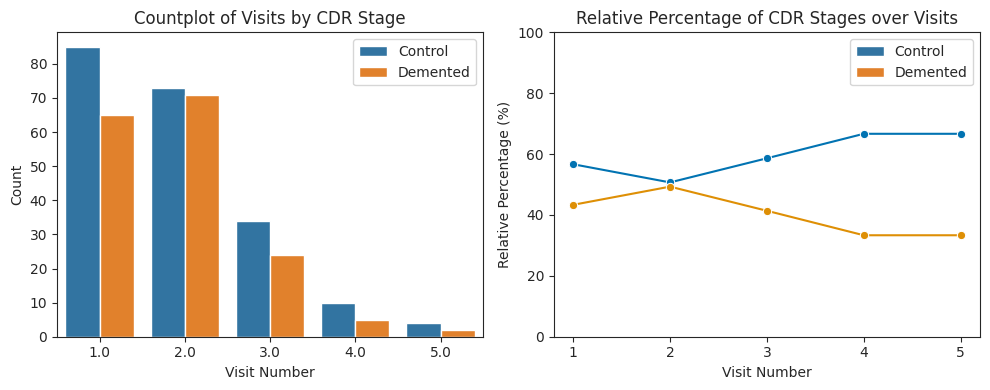

In [ ]:
# Create two subplots
ncol = 2
fig, axes = plt.subplots(1, ncol)

# Set the figure size
fig.set_figheight(4)
fig.set_figwidth(10)

# Set the Seaborn style to "ticks"
sns.set_style("ticks")

# Create a countplot in the first subplot
sns.countplot(df_long, x="Visit", hue="CDR", ax=axes[0])
axes[0].set_xlabel("Visit Number")
axes[0].set_ylabel("Count")

# Create a lineplot in the second subplot
sns.lineplot(
    count_df, x="Visit", y="Percentage",
    hue="CDR", palette="colorblind",
    marker="o", ax=axes[1]
)

axes[1].set_xlabel("Visit Number")
axes[1].set_ylabel("Relative Percentage (%)")
axes[1].set_xticks(range(1, 6)) # Set x-axis ticks from 1 to 5
axes[1].set_ylim(bottom=0, top=100) # Set y-axis limits from 0 to 100

# Get legend handles and labels from the first subplot
handles, _ = axes[0].get_legend_handles_labels()
# Create a legend mapping labels to handles for both subplots
labels = dict(zip(["Control", "Demented"], handles))

# Add legends
axes[0].legend(labels.values(), labels.keys())
axes[1].legend(labels.values(), labels.keys())

# Add titles
axes[0].set_title('Countplot of Visits by CDR Stage')
axes[1].set_title('Relative Percentage of CDR Stages over Visits')

# Adjust the layout for better visualization
plt.tight_layout()

Principal Component Analysis

In [ ]:
# Import packages
from sklearn.decomposition import PCA
from scipy.stats import mode

# Label cross-sectional samples with visit 1
df["Visit"] = df["Visit"].fillna(value=1)

# Drop target, categorical variables and metadata
X = df.drop(["Delay", "Subject ID", "Group", "Visit", "M/F", "Cohort"], axis=1)
y = X.pop("CDR")

# Impute SES on the fly
X["SES"] = X["SES"].map(lambda x: mode(X["SES"])[0] if np.isnan(x) else x)
# Impute MMSE on the fly
X["MMSE"] = X["MMSE"].map(lambda x: np.nanmedian(X["MMSE"]) if np.isnan(x) else x)

# Create PCA
pca = PCA(n_components=4)
# Perform PCA
red_dims = pca.fit_transform(X)

Text(0.5, 1.0, 'Correlation Heatmap of Features')

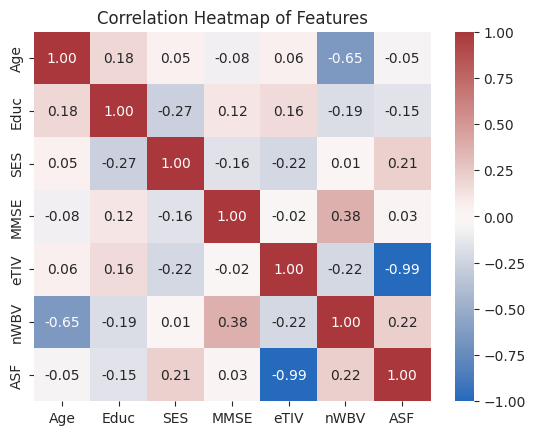

In [ ]:
# Compute the correlation matrix for the features in the dataset
corr = X.corr()

# Create a heatmap using seaborn
sns.heatmap(
    corr, cmap="vlag", annot=True,  # Display the heatmap with annotation
    fmt=".2f", annot_kws={'size': 10},  # Format annotations with two decimal places
    vmin=-1, vmax=1  # Set the color scale limits to -1 and 1
)

# Add a title
plt.title("Correlation Heatmap of Features")

In [ ]:
# Add sex back into variables
X["M/F"] = df["M/F"]
# Specify discrete variables
discrete_features = ["M/F", "SES", "Educ"]

# Factorise discrete variables
for col in discrete_features:
    X[col], _ = X[col].factorize()

# Convert type to integer
discrete_features = X.dtypes == int

Text(0.5, 1.0, 'Mutual Information of Features')

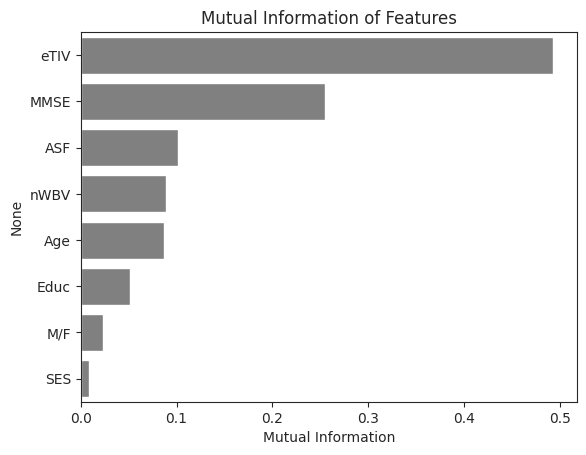

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
# Convert scores into series
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
# Sort scores by magnitude
mi_scores = mi_scores.sort_values(ascending=False)

# Visualise mutual information with barplot
sns.barplot(x=mi_scores, y=mi_scores.index, color="gray")
plt.xlabel("Mutual Information")
plt.title('Mutual Information of Features')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Initial preprocessing for cross-sectional data
# Drop rows with missing target (CDR)
df_cross= df_cross.dropna(subset=['CDR'])
# Concatenate 'M/F' columns from both DataFrames for fitting
all_mf_values = pd.concat([df_cross['M/F'], df_long['M/F']])
label_encoder_mf = LabelEncoder()
label_encoder_mf.fit(all_mf_values) # Fit on the combined data
df_cross['M/F'] = label_encoder_mf.transform(df_cross['M/F'])
df_long['M/F'] = label_encoder_mf.transform(df_long['M/F'])

# Encoding categorical features (M/F and Hand)
# The label_encoder_mf is already fitted, no need to refit
#df_cross['M/F'] = label_encoder_mf.fit_transform(df_cross['M/F'])
if 'Hand' not in df_cross.columns:
    df_cross['Hand'] = 'Unknown'  # Or any suitable default value

# Now proceed with encoding
label_encoder_hand = LabelEncoder()
df_cross['Hand'] = label_encoder_hand.fit_transform(df_cross['Hand'])

# This line is redundant, remove it
#label_encoder_hand = LabelEncoder()
#df_cross['Hand'] = label_encoder_hand.fit_transform(df_cross['Hand'])

# Impute missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df_cross[['Educ', 'SES', 'MMSE']] = imputer.fit_transform(df_cross[['Educ', 'SES', 'MMSE']])

# Separate features and target for cross-sectional data
X_cross_sectional = df_cross[['M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y_cross_sectional = df_cross['CDR']

# Split cross-sectional data for training and testing
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X_cross_sectional, y_cross_sectional, test_size=0.2, random_state=42)

# Initial preprocessing for longitudinal data
# Encode categorical columns
# The label_encoder_mf is already fitted, no need to refit
#df_long['M/F'] = label_encoder_mf.transform(df_long['M/F']) # This line caused the error

# Impute missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df_long[['Educ', 'SES', 'MMSE']] = imputer.fit_transform(df_long[['Educ', 'SES', 'MMSE']])


# Impute missing values in longitudinal data
df_long['SES'].fillna(df_long['SES'].mean(), inplace=True)
df_long['MMSE'].fillna(df_long['MMSE'].mean(), inplace=True)

# Longitudinal time-series data selection
# We will use 'Visit' as the time feature, and MMSE or CDR as the target for LSTM and ARIMA

# Display processed data for confirmation
X_train_cross.head(), y_train_cross.head(), df_long.head()

(               M/F  Hand  Age  Educ  SES  MMSE  eTIV   nWBV    ASF
 ID                                                                
 OAS1_0237_MR1    0     0   72   2.0  2.0  27.0  1322  0.764  1.328
 OAS1_0301_MR1    0     0   90   3.0  2.0  28.0  1495  0.761  1.174
 OAS1_0290_MR1    1     0   83   3.0  2.0  26.0  1992  0.706  0.881
 OAS1_0307_MR1    1     0   67   4.0  2.0  23.0  1399  0.735  1.255
 OAS1_0455_MR1    0     0   61   2.0  4.0  28.0  1354  0.825  1.297,
 ID
 OAS1_0237_MR1    0
 OAS1_0301_MR1    0
 OAS1_0290_MR1    1
 OAS1_0307_MR1    1
 OAS1_0455_MR1    0
 Name: CDR, dtype: int64,
                M/F  Age  Educ       SES  MMSE  CDR  eTIV   nWBV    ASF  \
 ID                                                                       
 OAS2_0001_MR1    1   87  14.0  2.000000  27.0    0  1987  0.696  0.883   
 OAS2_0001_MR2    1   88  14.0  2.000000  30.0    0  2004  0.681  0.876   
 OAS2_0002_MR1    1   75  12.0  2.460452  23.0    1  1678  0.736  1.046   
 OAS2_0002_MR2    

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_cross, y_train_cross)
xgb_predictions = xgb_model.predict(X_test_cross)

# XGBoost Model Evaluation
xgb_accuracy = accuracy_score(y_test_cross, xgb_predictions)
xgb_classification_report = classification_report(y_test_cross, xgb_predictions)

# Initialize and train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_cross, y_train_cross)
dt_predictions = dt_model.predict(X_test_cross)

# Decision Tree Model Evaluation
dt_accuracy = accuracy_score(y_test_cross, dt_predictions)
dt_classification_report = classification_report(y_test_cross, dt_predictions)

xgb_accuracy, xgb_classification_report, dt_accuracy, dt_classification_report


(0.7872340425531915,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83        30\n           1       0.71      0.71      0.71        17\n\n    accuracy                           0.79        47\n   macro avg       0.77      0.77      0.77        47\nweighted avg       0.79      0.79      0.79        47\n',
 0.8297872340425532,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.83      0.86        30\n           1       0.74      0.82      0.78        17\n\n    accuracy                           0.83        47\n   macro avg       0.81      0.83      0.82        47\nweighted avg       0.84      0.83      0.83        47\n')

In [ ]:
xgb_classification_report


'              precision    recall  f1-score   support\n\n           0       0.83      0.83      0.83        30\n           1       0.71      0.71      0.71        17\n\n    accuracy                           0.79        47\n   macro avg       0.77      0.77      0.77        47\nweighted avg       0.79      0.79      0.79        47\n'

In [ ]:
dt_classification_report


'              precision    recall  f1-score   support\n\n           0       0.89      0.83      0.86        30\n           1       0.74      0.82      0.78        17\n\n    accuracy                           0.83        47\n   macro avg       0.81      0.83      0.82        47\nweighted avg       0.84      0.83      0.83        47\n'

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - loss: 0.4857 - val_loss: 0.4957
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4742 - val_loss: 0.4885
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4615 - val_loss: 0.4816
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4507 - val_loss: 0.4748
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4409 - val_loss: 0.4682
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4693 - val_loss: 0.4618
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4583 - val_loss: 0.4556
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4491 - val_loss: 0.4496
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4055 - val_loss: 0.4436
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3979 - val_loss: 0.4376
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3910 - val_loss: 0.4314
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3517 - val_loss: 0.4252


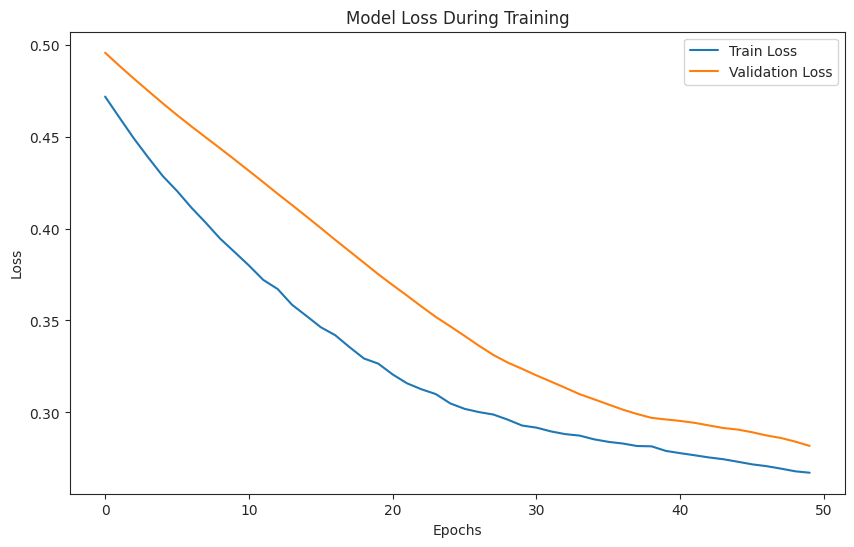

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


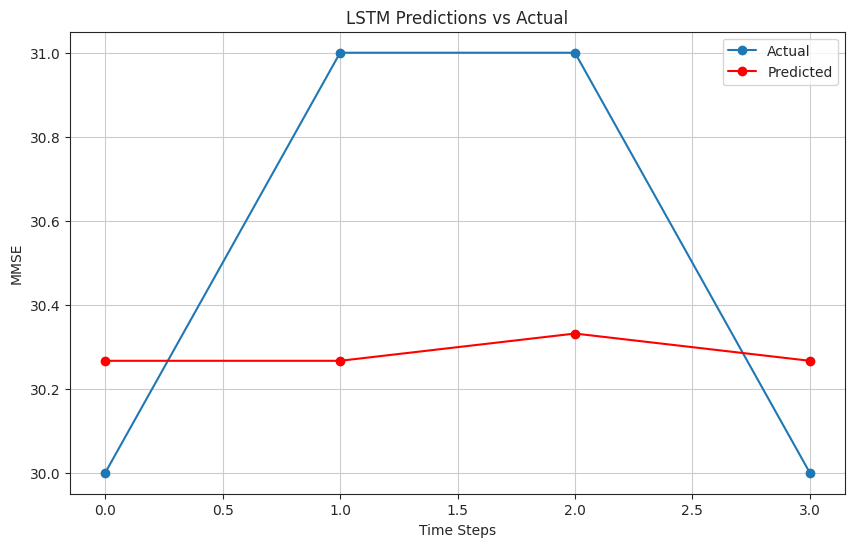

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter and sort data for all subjects
subject_data = data.sort_values(by=["Subject ID", "Visit"])

# Use MMSE as the time series variable
time_series = subject_data.groupby("Subject ID")["MMSE"].apply(lambda x: x.dropna().values)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Create sequences for LSTM
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3  # Number of timesteps

X, y = [], []
for subject_ts in time_series:
    if len(subject_ts) > n_steps:  # Check if enough data points for sequences
        time_series_scaled = scaler.fit_transform(subject_ts.reshape(-1, 1))
        X_subject, y_subject = create_sequences(time_series_scaled, n_steps)
        X.extend(X_subject)
        y.extend(y_subject)

X = np.array(X)
y = np.array(y)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data to fit LSTM input shape [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_inverse)), y_test_inverse, label='Actual', marker='o')
plt.plot(range(len(y_pred_inverse)), y_pred_inverse, label='Predicted', marker='o', color='red')
plt.title('LSTM Predictions vs Actual')  # Removed subject-specific title
plt.xlabel('Time Steps')
plt.ylabel('MMSE')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5308292806509729


In [ ]:
Accuracy=1.96*rmse
print(f"Accuracy: {Accuracy}")

Accuracy: 5.88


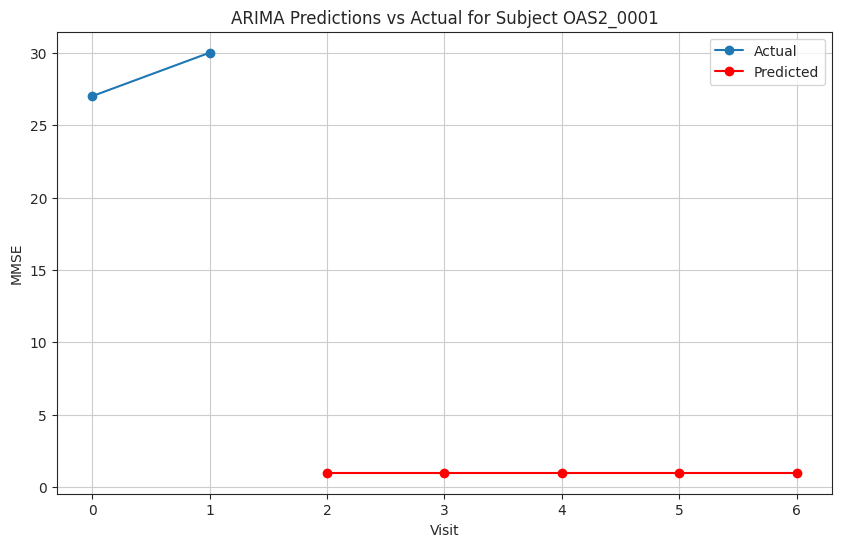

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter data for a specific subject (e.g., OAS2_0001)
subject_id = "OAS2_0001"
subject_data = data[data["Subject ID"] == subject_id].sort_values(by="Visit")

# Use MMSE as the time series variable
time_series = subject_data["MMSE"].dropna().values

# Initial ARIMA order
order = (0, 1, 0)

# Try fitting the model, reduce order if error
try:
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

    # Fit ARIMA model
    model = ARIMA(time_series_scaled, order=order)
    model_fit = model.fit()

except IndexError:
    print(f"IndexError encountered with order {order}. Reducing order to (1, 1, 0)...")
    order = (1, 1, 0)  # Reduce order

    # Try fitting with reduced order, if still error, use raw data
    try:
        model = ARIMA(time_series_scaled, order=order)
        model_fit = model.fit()
    except IndexError:
        print("IndexError still present. Fitting with raw data and reduced order...")
        model = ARIMA(time_series, order=order)
        model_fit = model.fit()


# Make predictions for next 5 visits
predictions = model_fit.predict(start=len(time_series), end=len(time_series) + 4)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label='Actual', marker='o')
plt.plot(range(len(time_series), len(time_series) + len(predictions)), predictions, label='Predicted', marker='o', color='red')
plt.title(f'ARIMA Predictions vs Actual for Subject {subject_id}')
plt.xlabel('Visit')
plt.ylabel('MMSE')
plt.legend()
plt.grid()
plt.show()

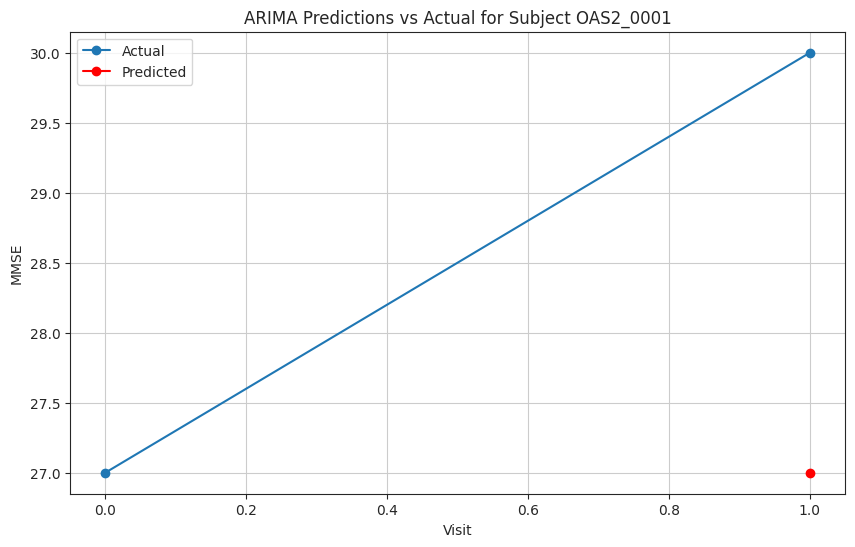

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter data for a specific subject (e.g., OAS2_0001)
subject_id = "OAS2_0001"
subject_data = data[data["Subject ID"] == subject_id].sort_values(by="Visit")

# Use MMSE as the time series variable
time_series = subject_data["MMSE"].dropna().values

# Initial ARIMA order
order = (0, 1, 0)

# Try fitting the model, reduce order if error
try:
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

    # Fit ARIMA model
    model = ARIMA(time_series_scaled, order=order)
    model_fit = model.fit()

except IndexError:
    print(f"IndexError encountered with order {order}. Reducing order to (1, 1, 0)...")
    order = (1, 1, 0)  # Reduce order

    # Try fitting with reduced order, if still error, use raw data
    try:
        model = ARIMA(time_series_scaled, order=order)
        model_fit = model.fit()
    except IndexError:
        print("IndexError still present. Fitting with raw data and reduced order...")
        model = ARIMA(time_series, order=order)
        model_fit = model.fit()


# Make predictions for the same length as the original time series
# start=1 to predict from the second data point onwards (as the first is used for initialization)
predictions = model_fit.predict(start=1, end=len(time_series) -1)

# Inverse transform the predictions if you scaled the data
if scaler:
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label='Actual', marker='o')
# Plot predictions starting from the second data point
plt.plot(range(1, len(time_series)), predictions, label='Predicted', marker='o', color='red')
plt.title(f'ARIMA Predictions vs Actual for Subject {subject_id}')
plt.xlabel('Visit')
plt.ylabel('MMSE')
plt.legend()
plt.grid()
plt.show()

Root Mean Squared Error (RMSE): 3.0
Mean Absolute Error (MAE): 3.0


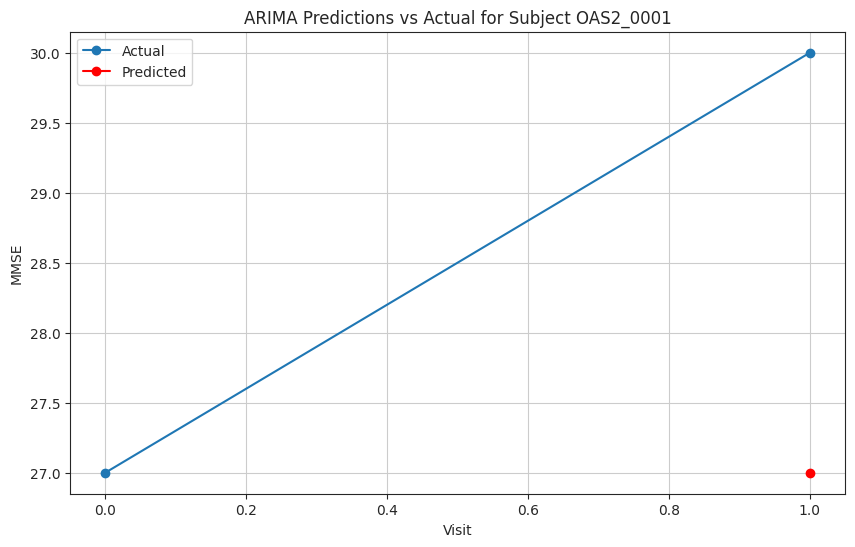

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter data for a specific subject (e.g., OAS2_0001)
subject_id = "OAS2_0001"
subject_data = data[data["Subject ID"] == subject_id].sort_values(by="Visit")

# Use MMSE as the time series variable
time_series = subject_data["MMSE"].dropna().values

# Initial ARIMA order
order = (0, 1, 0)

# Try fitting the model, reduce order if error
try:
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

    # Fit ARIMA model
    model = ARIMA(time_series_scaled, order=order)
    model_fit = model.fit()

except IndexError:
    print(f"IndexError encountered with order {order}. Reducing order to (1, 1, 0)...")
    order = (1, 1, 0)  # Reduce order

    # Try fitting with reduced order, if still error, use raw data
    try:
        model = ARIMA(time_series_scaled, order=order)
        model_fit = model.fit()
    except IndexError:
        print("IndexError still present. Fitting with raw data and reduced order...")
        model = ARIMA(time_series, order=order)
        model_fit = model.fit()


# Make predictions for the same length as the original time series
# start=1 to predict from the second data point onwards (as the first is used for initialization)
predictions = model_fit.predict(start=1, end=len(time_series) - 1)

# Inverse transform the predictions if you scaled the data
if scaler:
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = sqrt(mean_squared_error(time_series[1:], predictions)) # Compare with actual values from the second data point onwards
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(time_series[1:], predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(time_series)), time_series, label='Actual', marker='o')
# Plot predictions starting from the second data point
plt.plot(range(1, len(time_series)), predictions, label='Predicted', marker='o', color='red')
plt.title(f'ARIMA Predictions vs Actual for Subject {subject_id}')
plt.xlabel('Visit')
plt.ylabel('MMSE')
plt.legend()
plt.grid()
plt.show()

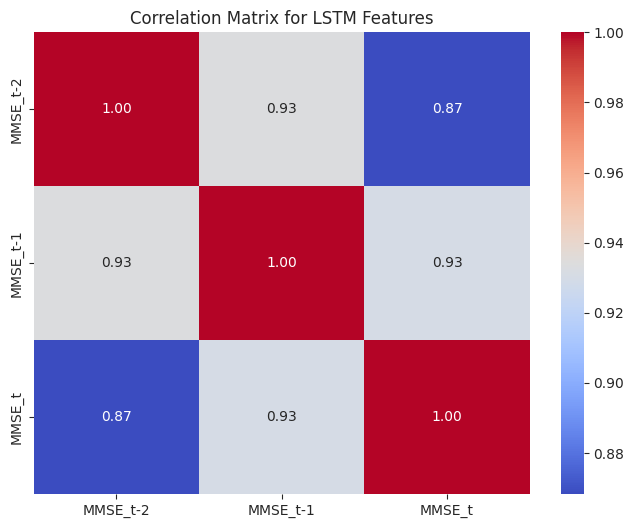

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter and sort data for all subjects
subject_data = data.sort_values(by=["Subject ID", "Visit"])

# Use MMSE as the time series variable
time_series = subject_data.groupby("Subject ID")["MMSE"].apply(lambda x: x.dropna().values)

# Prepare data for LSTM
X, y = [], []
for subject_ts in time_series:
    if len(subject_ts) > 3:  # Ensure enough data points for sequences
        for i in range(len(subject_ts) - 3):
            X.append(subject_ts[i:i + 3])  # Use previous 3 MMSE scores as features
            y.append(subject_ts[i + 3])  # Predict the next MMSE score

X = np.array(X)
y = np.array(y)

# Create a DataFrame for features
features_df = pd.DataFrame(X, columns=['MMSE_t-2', 'MMSE_t-1', 'MMSE_t'])

# Calculate the correlation matrix
correlation_matrix = features_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for LSTM Features')
plt.show()

<Figure size 1000x400 with 0 Axes>

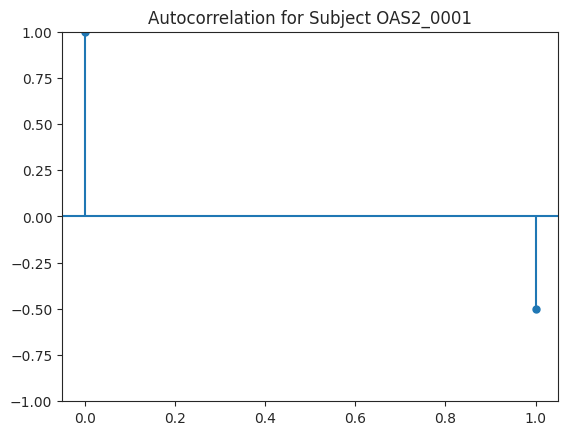

<Figure size 1000x400 with 0 Axes>

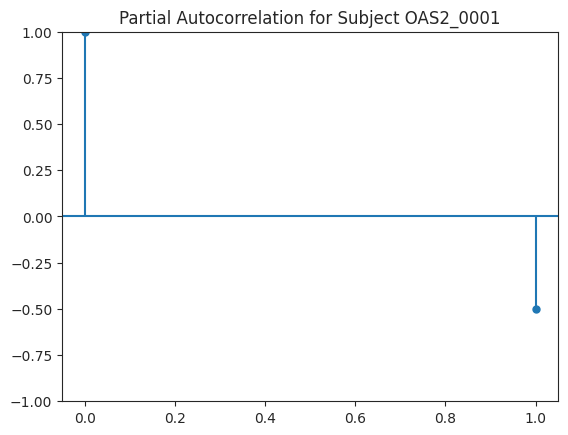

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter data for a specific subject (e.g., OAS2_0001)
subject_id = "OAS2_0001"
subject_data = data[data["Subject ID"] == subject_id].sort_values(by="Visit")

# Use MMSE as the time series variable
time_series = subject_data["MMSE"].dropna().values

# Adjust lags to be less than or equal to the length of the time series - 1
# This prevents the ValueError related to broadcasting
lags_to_use = min(5, len(time_series) - 1)

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
plot_acf(time_series, lags=lags_to_use, title=f"Autocorrelation for Subject {subject_id}")
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 4))
plot_pacf(time_series, lags=lags_to_use, title=f"Partial Autocorrelation for Subject {subject_id}")
plt.show()

Insufficient data for LSTM forecasting with given n_steps.
Insufficient data for XGBoost forecasting with given n_steps.
ARIMA MAE: 3.0
LSTM MAE: 3.0
XGBoost MAE: 3.0
Decision Tree MAE: 3.0


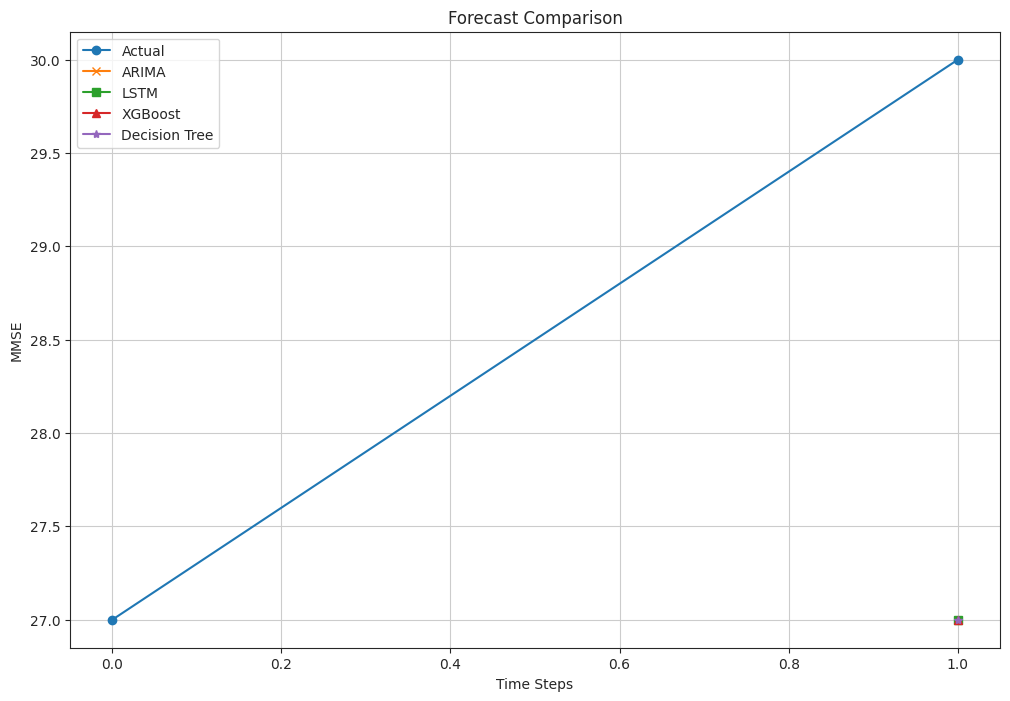

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Filter data for a specific subject (e.g., OAS2_0001)
subject_id = "OAS2_0001"
subject_data = data[data["Subject ID"] == subject_id].sort_values(by="Visit")

# Use MMSE as the time series variable
time_series = subject_data["MMSE"].dropna().values

# Train-test split
n_train = int(len(time_series) * 0.8)
train, test = time_series[:n_train], time_series[n_train:]

# Function to evaluate model accuracy
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} MAE: {mae}")
    return mae

# --- ARIMA Model ---
def arima_forecast(train, test):
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

# --- LSTM Model ---
def lstm_forecast(train, test, n_steps=5):
  if len(train) <= n_steps:
        print("Insufficient data for LSTM forecasting with given n_steps.")
        # Return a simple forecast (e.g., last value) or raise an exception
        return np.repeat(train[-1], len(test))
  scaler = MinMaxScaler(feature_range=(0, 1))
  train_scaled = scaler.fit_transform(train.reshape(-1, 1))

    # Create sequences
  def create_sequences(data, n_steps):
        X, y = [], []
        for i in range(len(data) - n_steps):
            X.append(data[i:i + n_steps])
            y.append(data[i + n_steps])
        return np.array(X), np.array(y)


        X_train, y_train = create_sequences(train_scaled, n_steps)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
  model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps, 1)),
        Dense(1)
    ])
  model.compile(optimizer='adam', loss='mse')
  model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

    # Generate forecasts
  inputs = train[-n_steps:].reshape(1, n_steps, 1)
  forecasts = []
  for _ in range(len(test)):
        pred = model.predict(inputs)
        forecasts.append(pred[0, 0])
        inputs = np.append(inputs[:, 1:, :], [[pred]], axis=1)

  forecasts = scaler.inverse_transform(np.array(forecasts).reshape(1, -1)).flatten()
  return forecasts

# --- XGBoost Model ---
def xgboost_forecast(train, test, n_steps=5):
    # Create sequences
    def create_sequences(data, n_steps):
        X, y = [], []
        for i in range(len(data) - n_steps):
            X.append(data[i:i + n_steps])
            y.append(data[i + n_steps])
        return np.array(X), np.array(y)
    if len(train) <= n_steps:
        print("Insufficient data for XGBoost forecasting with given n_steps.")
        # Return a simple forecast (e.g., last value) or raise an exception
        return np.repeat(train[-1], len(test))

    X_train, y_train = create_sequences(train, n_steps)
    X_test, _ = create_sequences(np.concatenate((train[-n_steps:], test)), n_steps)
    X_train = X_train.reshape(X_train.shape[-1], -1)  # Reshape to (samples, timesteps * features)
    X_test = X_test.reshape(X_test.shape[-1], -1)     # Reshape to (samples, timesteps * features)

    model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
    model.fit(X_train, y_train)
    forecasts = model.predict(X_test)
    return forecasts



# --- Decision Tree Model ---
def decision_tree_forecast(train, test, n_steps=5):
    # Create sequences
    def create_sequences(data, n_steps):
        X, y = [], []
        if len(data) <= n_steps:
            # Pad the data with the last value to create sequences
            data = np.pad(data, (n_steps - len(data) + 1, 0), 'edge')
        for i in range(len(data) - n_steps):
            X.append(data[i:i + n_steps])
            y.append(data[i + n_steps])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train, n_steps)
    X_test, _ = create_sequences(np.concatenate((train[-n_steps:], test)), n_steps)
    if X_train.ndim == 1:
        X_train = X_train.reshape(1, -1)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    forecasts = model.predict(X_test)
    return forecasts

    # model = DecisionTreeRegressor()
    # model.fit(X_train, y_train)
    # forecasts = model.predict(X_test)
    # return forecasts

# Generate forecasts for all models
arima_preds = arima_forecast(train, test)
lstm_preds = lstm_forecast(train, test)
xgb_preds = xgboost_forecast(train, test)
dt_preds = decision_tree_forecast(train, test)

# Evaluate models
arima_mae = evaluate_model(test, arima_preds, "ARIMA")
lstm_mae = evaluate_model(test, lstm_preds, "LSTM")
xgb_mae = evaluate_model(test, xgb_preds, "XGBoost")
dt_mae = evaluate_model(test, dt_preds, "Decision Tree")

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(len(time_series)), time_series, label='Actual', marker='o')
plt.plot(range(n_train, n_train + len(test)), arima_preds, label='ARIMA', marker='x')
plt.plot(range(n_train, n_train + len(test)), lstm_preds, label='LSTM', marker='s')
plt.plot(range(n_train, n_train + len(test)), xgb_preds, label='XGBoost', marker='^')
plt.plot(range(n_train, n_train + len(test)), dt_preds, label='Decision Tree', marker='*')
plt.title('Forecast Comparison')
plt.xlabel('Time Steps')
plt.ylabel('MMSE')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


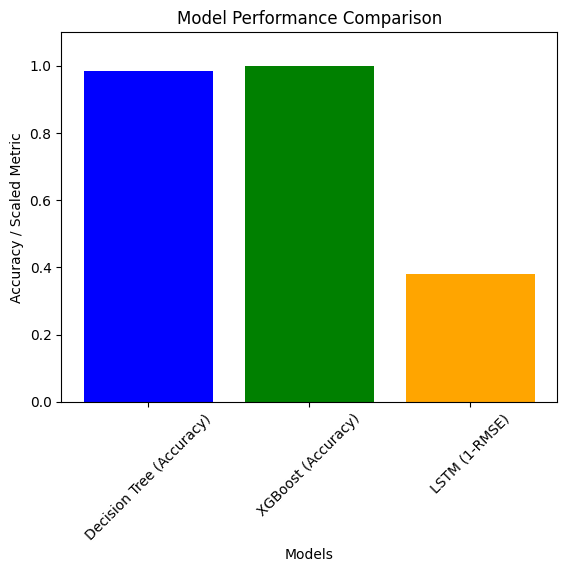

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/oasis_longitudinal.csv'
data = pd.read_csv(file_path)

# Drop rows with missing target values
data = data.dropna(subset=["Group", "MMSE"])  # Ensure no NaN in targets

# Encode categorical variables
data["Group"] = data["Group"].map({"Demented": 1, "Nondemented": 0})
data = pd.get_dummies(data, columns=["M/F", "Hand"], drop_first=True)

# Split features and target
X = data.drop(["Group", "Subject ID", "MRI ID"], axis=1)
y = data["Group"]

# Check for NaN values in features and fill or drop if necessary
X = X.fillna(X.mean())  # Fill missing values with column mean (optional)

# ***Drop rows with NaN in target variable before train-test split***
X = X[y.notna()] # Keep rows in X where y is not NaN
y = y[y.notna()] # Keep rows in y where y is not NaN

# Train-test split for classification models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Tree ###
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

### 2. XGBoost ###
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

### 3. LSTM ###
# Prepare data for LSTM (sequence of MMSE)
data = data.sort_values(by=["Subject ID", "Visit"])  # Ensure data is sequential
scaler = MinMaxScaler()
data["MMSE"] = scaler.fit_transform(data["MMSE"].values.reshape(-1, 1))

# Group by subject to create sequences
grouped = data.groupby("Subject ID")
sequences = [group["MMSE"].values for _, group in grouped if len(group) > 1]

# Create input-output pairs
X_lstm, y_lstm = [], []
for seq in sequences:
    for i in range(len(seq) - 1):
        X_lstm.append(seq[i:i + 1].reshape(1, 1, 1))
        y_lstm.append(seq[i + 1])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Train-test split for LSTM
# ... (previous code) ...

# Train-test split for LSTM
X_lstm_train, X_lstm_test = X_lstm[:int(0.8 * len(X_lstm))], X_lstm[int(0.8 * len(X_lstm)):]
y_lstm_train, y_lstm_test = y_lstm[:int(0.8 * len(y_lstm))], y_lstm[int(0.8 * len(y_lstm)):]
lstm_model = Sequential([
    LSTM(50, input_shape=(X_lstm.shape[1], X_lstm.shape[2]), return_sequences=False),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")

# Train LSTM model
lstm_model.fit(X_lstm_train, y_lstm_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_lstm_test, y_lstm_test))

# Evaluate LSTM
lstm_y_pred = lstm_model.predict(X_lstm_test)
lstm_rmse = np.sqrt(mean_squared_error(y_lstm_test, lstm_y_pred))

### 4. ARIMA ###
# Select a single subject's data for ARIMA
subject_data = data[data["Subject ID"] == "OAS2_0001"]["MMSE"]
if len(subject_data) < len(y_test):
    print("Warning: Insufficient data for ARIMA evaluation. Consider using a different subject.")
else:
    arima_model = ARIMA(subject_data, order=(0, 0, 1))
    arima_result = arima_model.fit()

    # Forecast using the length of subject_data for meaningful comparison
    arima_forecast = arima_result.forecast(steps=len(subject_data) - len(y_test))

    # Compare forecast with the corresponding portion of subject_data
    arima_mae = mean_absolute_error(subject_data.iloc[len(subject_data) - len(arima_forecast):], arima_forecast)
    arima_mae = mean_absolute_error(subject_data.iloc[len(subject_data) - len(arima_forecast):], arima_forecast)


# Scale metrics for comparison
performance = {
    "Decision Tree (Accuracy)": dt_accuracy,
    "XGBoost (Accuracy)": xgb_accuracy,
    "LSTM (1-RMSE)": 1 - lstm_rmse,
    # "ARIMA (1-MAE)": 1 - arima_mae
}

### Plot Performance Metrics ###
plt.bar(performance.keys(), performance.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy / Scaled Metric")
plt.xlabel("Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.show() # Define y_lstm_train and y_lstm_test

# ... (rest of the code) ...